ONE LAYER

In [33]:
import os
import tarfile
import matplotlib.pyplot as plt
import pandas as pd
import torch
from pathlib import Path
from NeuralNMF import train
from sklearn.feature_extraction.text import TfidfVectorizer
from NeuralNMF import Neural_NMF
import pickle
import scipy.io
import random
import numpy as np


np.random.seed(0)
random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)


mat_data = scipy.io.loadmat(r"C:\Users\ASUS\Downloads\For_Tezuka\For_Tezuka\Opto_Data_CLa18.mat")

print(mat_data["C"][0])



[array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         6.42740394e-004, 6.10910320e-004, 5.80656549e-004],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [9.48571063e-001, 8.94820508e-001, 8.44115714e-001, ...,
         3.88815240e-004, 3.66783116e-004, 3.45999437e-004],
        ...,
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         5.91954733e-176, 5.09093362e-176, 4.37830863e-176],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])
 array([[5.51901019e-004, 5.24569533e-004, 4.98591569e-004, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+0

In [35]:
mat_data["S"][0][0].shape

(81, 6012)

In [36]:
train__ = mat_data["S"][0][0]

train__ = torch.tensor(train__)

In [37]:
opto = mat_data["opt"][0][0]

In [38]:
opto

array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [84]:
m, k1 = 81, 3
net = Neural_NMF([m, k1])

In [85]:
history = train(net, train__, epoch=10, lr=500, supervised=False)

100%|██████████| 10/10 [00:04<00:00,  2.33it/s]


In [86]:
history[1][0].shape

torch.Size([3, 6012])

In [87]:
A = history[0][0]
B = history[1][0]

In [88]:
A

Parameter containing:
tensor([[ 1.8906e-01,  2.0649e+00,  1.4022e-01],
        [ 4.3781e-02,  1.3738e+00, -4.4124e-02],
        [ 7.3458e-01,  3.9264e+00,  1.7460e-01],
        [ 1.4625e+00,  3.1290e-01, -1.4109e-01],
        [ 2.7479e-01, -1.4060e-02, -5.9627e-03],
        [ 5.1304e-01, -1.7508e-01,  1.2277e+00],
        [-1.5518e-01,  3.4888e+00, -2.9647e-01],
        [-1.9984e-02, -1.7785e-02,  4.5769e-01],
        [ 5.8341e-01,  5.9631e-01,  4.6962e-02],
        [ 7.5941e-02, -2.2967e-01,  2.9876e+00],
        [ 1.2355e-01,  8.7677e-01,  6.5399e-01],
        [ 3.1383e+00, -1.2821e-01, -3.6779e-02],
        [ 1.2933e+00,  2.9230e-01,  4.9066e-02],
        [ 7.1899e-02, -1.0720e-01,  1.4325e+00],
        [ 8.6116e-01,  6.3905e-03, -6.1368e-03],
        [ 4.8268e-01, -1.9739e-01,  1.5050e+00],
        [ 2.1032e-01, -1.4424e-01,  1.2222e+00],
        [ 5.7954e-01,  9.2616e-01, -1.5639e-02],
        [ 2.8366e-01,  1.7656e-01,  1.0085e-01],
        [ 4.7209e-01,  8.7782e-01,  1.6829e+00]

In [89]:
B

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64,
       grad_fn=<LsqNonnegFBackward>)

In [90]:
A1 = A.detach().numpy()
B1 = B.detach().numpy()

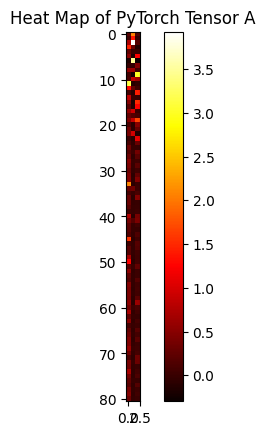

In [91]:
plt.imshow(A1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor A')
plt.show()

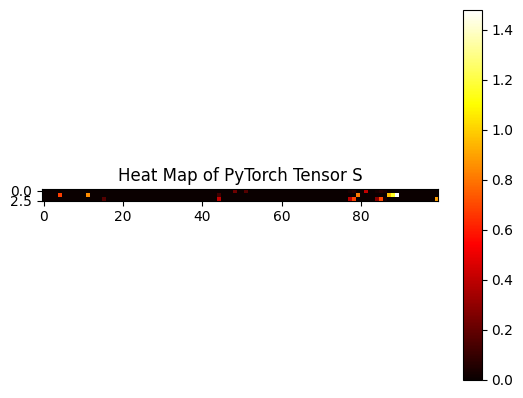

In [92]:
plt.imshow(B1[:,100:200], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()

In [93]:
import numpy as np
opto = np.array(opto)

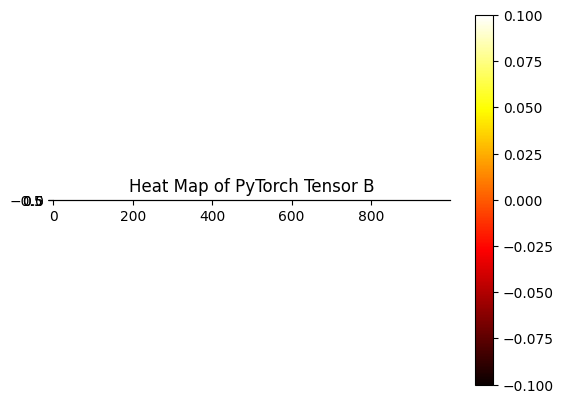

In [94]:
plt.imshow(opto[:,2000:3000], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor B')
plt.show()

In [95]:
A1

array([[ 1.89060867e-01,  2.06488607e+00,  1.40222297e-01],
       [ 4.37807154e-02,  1.37377468e+00, -4.41238606e-02],
       [ 7.34578947e-01,  3.92638945e+00,  1.74602064e-01],
       [ 1.46246021e+00,  3.12899686e-01, -1.41088203e-01],
       [ 2.74785910e-01, -1.40595690e-02, -5.96271717e-03],
       [ 5.13038546e-01, -1.75081978e-01,  1.22768247e+00],
       [-1.55181258e-01,  3.48875416e+00, -2.96466390e-01],
       [-1.99843577e-02, -1.77854803e-02,  4.57685568e-01],
       [ 5.83413557e-01,  5.96310171e-01,  4.69618323e-02],
       [ 7.59409350e-02, -2.29666204e-01,  2.98759595e+00],
       [ 1.23551400e-01,  8.76769366e-01,  6.53990577e-01],
       [ 3.13825443e+00, -1.28214749e-01, -3.67788664e-02],
       [ 1.29333540e+00,  2.92303261e-01,  4.90658861e-02],
       [ 7.18987024e-02, -1.07204194e-01,  1.43247317e+00],
       [ 8.61161504e-01,  6.39051861e-03, -6.13677953e-03],
       [ 4.82682535e-01, -1.97392643e-01,  1.50495069e+00],
       [ 2.10318785e-01, -1.44240178e-01

In [96]:
count_ones = np.count_nonzero(opto == 1)
count_ones

95

In [97]:
opto.shape

(1, 6012)

In [98]:
B1.shape

(3, 6012)

In [99]:
indices = np.where(opto == 1)[1]

In [100]:
indices

array([3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3416,
       3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3714, 3715,
       3716, 3717, 3718, 3719, 3720, 3721, 3722, 3723, 4012, 4013, 4014,
       4015, 4016, 4017, 4018, 4019, 4020, 4310, 4311, 4312, 4313, 4314,
       4315, 4316, 4317, 4318, 4608, 4609, 4610, 4611, 4612, 4613, 4614,
       4615, 4616, 4906, 4907, 4908, 4909, 4910, 4911, 4912, 4913, 4914,
       5204, 5205, 5206, 5207, 5208, 5209, 5210, 5211, 5212, 5501, 5502,
       5503, 5504, 5505, 5506, 5507, 5508, 5509, 5510, 5799, 5800, 5801,
       5802, 5803, 5804, 5805, 5806, 5807, 5808], dtype=int64)

In [101]:
slices = []
for idx in indices:
    # Ensure we do not go out of bounds
    if idx + 20 <= B1.shape[1]:
        slices.append(B1[:, idx:idx+20])
    else:
        slices.append(B1[:, idx:])

In [102]:
C = np.hstack(slices) if slices else np.array([])

In [103]:
C.shape

(3, 1900)

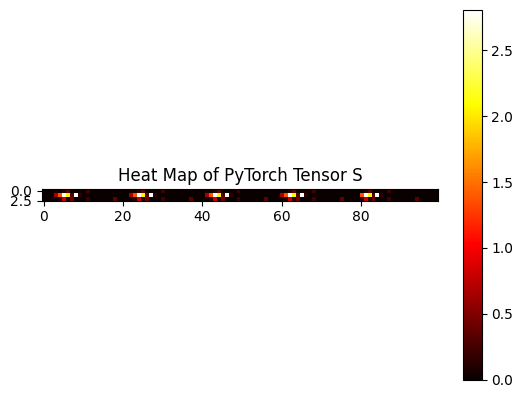

In [104]:
plt.imshow(C[:,:100], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()

In [27]:
A.shape

torch.Size([101, 10])

In [28]:
train__.shape

torch.Size([101, 5957])

In [29]:
slices2 = []
for idx in indices:
    # Ensure we do not go out of bounds
    if idx + 20 <= train__.shape[1]:
        slices2.append(train__[:, idx:idx+20])
    else:
        slices2.append(train__[:, idx:])

In [30]:
C1 = np.hstack(slices2) if slices2 else np.array([])

In [31]:
C1.shape

(101, 1900)

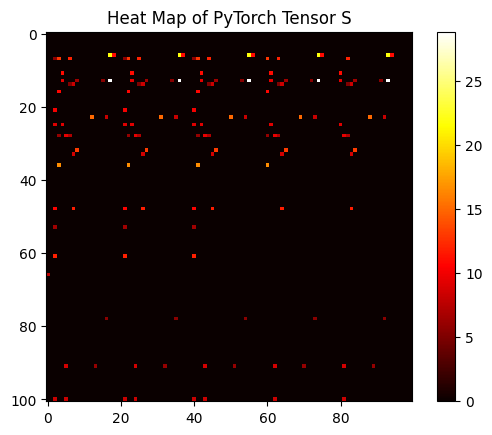

In [32]:
plt.imshow(C1[:,200:300], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()

STOP HERE

In [189]:
m1, k2 = 101, 40
net1 = Neural_NMF([m1, k2])

In [190]:
history1 = train(net1, train__, epoch=10, lr=500, supervised=False)

100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


In [191]:
A2 = history1[0][0]
B2 = history1[1][0]
A3 = A2.detach().numpy()
B3 = B2.detach().numpy()

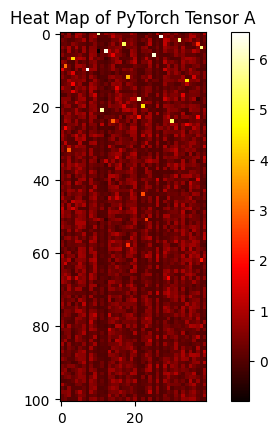

In [192]:
plt.imshow(A3, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor A')
plt.show()

In [193]:
Ex = train__[:, indices[0]:indices[0]+40]

In [194]:
Ex.shape

torch.Size([101, 40])

In [195]:
i = 51
Ex = train__[:, indices[i]:indices[i]+40]
diff = A2 - Ex
l2 = torch.norm(diff,p=2)
l2


tensor(71.1596, dtype=torch.float64, grad_fn=<LinalgVectorNormBackward0>)

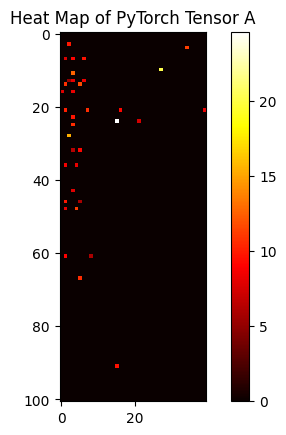

In [196]:
plt.imshow(Ex, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor A')
plt.show()

In [197]:
j = 7
diff2 = A2 - train__[:,40*j:40*j+40]
l2_ = torch.norm(diff2,p=2)
l2_

tensor(63.2942, dtype=torch.float64, grad_fn=<LinalgVectorNormBackward0>)

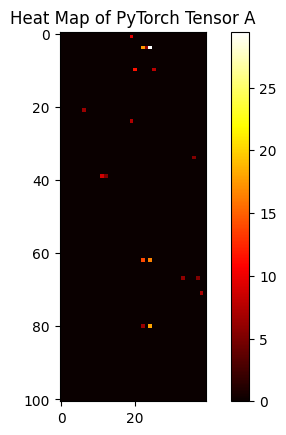

In [198]:
plt.imshow(train__[:,40*j:40*j+40], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor A')
plt.show()